In [ ]:
#sklearn 1.1.0버전으로 재설치

# !pip uninstall sklearn
# !pip install --upgrade sklearn
# !pip install scikit-learn==1.1.0 --user

#버전 확인(커널 닫았다가 열기)
# import sklearn
# sklearn.__version__

# #오버샘플링
# !pip install imblearn

# #xgboost
# !pip install xgboost

^C
^C
^C


In [ ]:
# 코랩용 나눔폰트 설치
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (10.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

## 데이터 불러오기, 개요 확인

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

%matplotlib inline

In [ ]:
#코랩용
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#코랩용
#food = pd.read_csv('/content/drive/MyDrive/bigdata_ML/중식 생존.csv', encoding='cp949') #csv 불러오기 코랩용

In [2]:
#주피터용
food = pd.read_csv('중식 생존.csv', encoding='cp949') #csv 불러오기 주피터용

In [3]:
food.head() #csv 5행만 보기

,영업상태구분코드,사업장명,소재지면적,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업,...,아파트 세대수,제곱미터 당 임대료,임대료,총생활인구수,점심저녁시간대 생활인구수,골목상권,발달상권,구분불가,전통시장,관광특구
0,1,성빈,28,100,13,246,60,657,715,1372,...,17649,25046.59667,713,23494.27530,24802.59456,1,0,0,0,0
1,1,왕차이,54,55,30,35,46,793,600,1393,...,2580,40597.92000,2172,31344.24743,35491.54168,1,0,0,0,0
2,1,천미향,50,95,28,99,117,1444,849,2293,...,10730,111778.28750,5589,21376.05003,22107.54510,1,0,0,0,0
3,1,뚱보언니 쇠고기 국수,40,133,24,73,331,1445,1459,2904,...,4583,34304.46800,1372,60057.69875,72929.04225,1,0,0,0,0
4,1,중경특수숯불구이,31,134,24,79,344,1444,1471,2915,...,5076,34304.46800,1063,60057.69875,72929.04225,1,0,0,0,0


In [4]:
food.info() #데이터 개요 확인 (열이름, 개수,데이터유형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영업상태구분코드       1348 non-null   int64  
 1   사업장명           1348 non-null   object 
 2   소재지면적          1348 non-null   int64  
 3   교통 수           1348 non-null   int64  
 4   집객시설 수         1348 non-null   int64  
 5   교육 수           1348 non-null   int64  
 6   경쟁자 수          1348 non-null   int64  
 7   인허가 영업         1348 non-null   int64  
 8   인허가 폐업         1348 non-null   int64  
 9   인허가 영업+폐업      1348 non-null   int64  
 10  타업종비율          1348 non-null   float64
 11  타업종경쟁자         1348 non-null   int64  
 12  버퍼내폐업비율        1348 non-null   float64
 13  영업기간           1348 non-null   int64  
 14  생존여부           1348 non-null   int64  
 15  아파트 세대수        1348 non-null   int64  
 16  제곱미터 당 임대료     1348 non-null   float64
 17  임대료            1348 non-null   int64  
 18  총생활인구수  

# 결측치 확인 및 전처리

In [6]:
#문자형 변수 확인
object_columns = food.columns[food.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 확인
food[object_columns]

object 칼럼은 다음과 같습니다 :  ['사업장명']


,사업장명
0,성빈
1,왕차이
2,천미향
3,뚱보언니 쇠고기 국수
4,중경특수숯불구이
...,...
1343,명성옛날짜장
1344,홍짜장
1345,황금룡
1346,동네반점


In [7]:
feature1columns =list(food.columns.difference(food[object_columns].columns)) #필요없는 문자형 변수 제외
food=food[feature1columns]

In [8]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,제곱미터 당 임대료,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,60,1,0,246,100,0,0,0.521137,0,28,...,1372,715,713,0,24802.594560,25046.59667,13,23494.275300,1312,0.956268
1,46,1,0,35,55,0,0,0.430725,0,54,...,1393,600,2172,0,35491.541680,40597.92000,30,31344.247430,1347,0.966978
2,117,1,0,99,95,0,0,0.370257,1,50,...,2293,849,5589,0,22107.545100,111778.28750,28,21376.050030,2176,0.948975
3,331,1,0,73,133,0,0,0.502410,1,40,...,2904,1459,1372,0,72929.042250,34304.46800,24,60057.698750,2573,0.886019
4,344,1,0,79,134,0,0,0.504631,1,31,...,2915,1471,1063,0,72929.042250,34304.46800,24,60057.698750,2571,0.881990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,12,0,0,100,59,1,0,0.532819,0,93,...,259,138,4931,0,19983.210130,53007.83125,3,20583.411930,247,0.953668
1344,78,0,0,205,84,1,0,0.529735,0,43,...,2186,1158,1540,0,26698.175650,35804.80750,17,29820.769780,2108,0.964318
1345,57,0,0,371,84,1,0,0.516270,0,25,...,1598,825,895,0,26698.175650,35804.80750,12,29820.769780,1541,0.964330
1346,100,0,0,180,88,1,0,0.531448,0,26,...,2687,1428,803,0,26737.123970,30875.16667,20,27924.801280,2587,0.962784


In [9]:
food.columns

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '생존여부', '소재지면적', '아파트 세대수', '영업기간', '영업상태구분코드', '인허가 영업', '인허가 영업+폐업',
       '인허가 폐업', '임대료', '전통시장', '점심저녁시간대 생활인구수', '제곱미터 당 임대료', '집객시설 수',
       '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [10]:
feature2columns =list(food.columns.difference(food[['영업기간','제곱미터 당 임대료','영업상태구분코드']].columns)) #추가로 필요없는 변수 제외
food=food[feature2columns]

In [11]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,60,1,0,246,100,0,0,0.521137,0,28,...,657,1372,715,713,0,24802.594560,13,23494.275300,1312,0.956268
1,46,1,0,35,55,0,0,0.430725,0,54,...,793,1393,600,2172,0,35491.541680,30,31344.247430,1347,0.966978
2,117,1,0,99,95,0,0,0.370257,1,50,...,1444,2293,849,5589,0,22107.545100,28,21376.050030,2176,0.948975
3,331,1,0,73,133,0,0,0.502410,1,40,...,1445,2904,1459,1372,0,72929.042250,24,60057.698750,2573,0.886019
4,344,1,0,79,134,0,0,0.504631,1,31,...,1444,2915,1471,1063,0,72929.042250,24,60057.698750,2571,0.881990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,12,0,0,100,59,1,0,0.532819,0,93,...,121,259,138,4931,0,19983.210130,3,20583.411930,247,0.953668
1344,78,0,0,205,84,1,0,0.529735,0,43,...,1028,2186,1158,1540,0,26698.175650,17,29820.769780,2108,0.964318
1345,57,0,0,371,84,1,0,0.516270,0,25,...,773,1598,825,895,0,26698.175650,12,29820.769780,1541,0.964330
1346,100,0,0,180,88,1,0,0.531448,0,26,...,1259,2687,1428,803,0,26737.123970,20,27924.801280,2587,0.962784


In [12]:
#출처 : https://dacon.io/competitions/official/235959/codeshare/5934?page&dtype&ptype&fType
# 먼저 결측치가 얼마나 있는지 확인합니다. 
# csv형태에서 먼저 결측치있는 행을 제거하여 null값이 없습니다

food.isna().sum()

경쟁자 수            0
골목상권             0
관광특구             0
교육 수             0
교통 수             0
구분불가             0
발달상권             0
버퍼내폐업비율          0
생존여부             0
소재지면적            0
아파트 세대수          0
인허가 영업           0
인허가 영업+폐업        0
인허가 폐업           0
임대료              0
전통시장             0
점심저녁시간대 생활인구수    0
집객시설 수           0
총생활인구수           0
타업종경쟁자           0
타업종비율            0
dtype: int64

# EDA

In [13]:
food.describe(include="all") #데이터의 통계적인 개요 확인

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,생존여부,소재지면적,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,...,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,155.233680,0.289318,0.003709,198.945846,90.822700,0.407270,0.260386,0.484357,0.153561,82.488872,...,1026.873145,1994.005193,967.132047,3160.145401,0.039318,35490.041381,27.295252,32497.762269,1838.771513,0.928642
std,165.421146,0.453614,0.060813,185.140820,27.279774,0.491508,0.439008,0.058792,0.360661,105.735473,...,517.398274,990.784270,506.049451,4645.939046,0.194421,23265.595667,43.539625,17946.432241,919.463579,0.057470
min,2.000000,0.000000,0.000000,6.000000,14.000000,0.000000,0.000000,0.304603,0.000000,7.000000,...,12.000000,26.000000,14.000000,219.000000,0.000000,3905.885804,0.000000,4401.522917,24.000000,0.744139
25%,53.000000,0.000000,0.000000,100.000000,72.000000,0.000000,0.000000,0.465887,0.000000,30.750000,...,646.750000,1260.500000,619.000000,1029.000000,0.000000,18843.255600,9.000000,19528.697283,1204.000000,0.926135
50%,86.000000,0.000000,0.000000,141.000000,92.000000,0.000000,0.000000,0.493468,0.000000,54.000000,...,928.000000,1789.000000,849.500000,1915.000000,0.000000,28056.875490,14.000000,27256.668330,1653.000000,0.953413
75%,177.000000,1.000000,0.000000,246.000000,109.000000,1.000000,1.000000,0.522820,0.000000,93.000000,...,1388.000000,2672.000000,1299.750000,3496.000000,0.000000,47422.941080,21.000000,41194.877900,2300.000000,0.962035
max,735.000000,1.000000,1.000000,1636.000000,169.000000,1.000000,1.000000,0.666667,1.000000,1346.000000,...,2637.000000,5111.000000,2814.000000,68454.000000,1.000000,134994.908800,311.000000,108753.472800,4898.000000,0.978313


In [14]:
#주피터용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [15]:
#코랩용
#plt.rc('font', family='NanumBarunGothic') 

<AxesSubplot:ylabel='골목상권'>

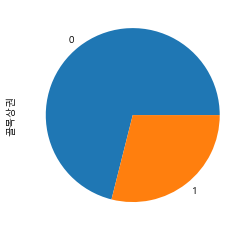

In [16]:
food['골목상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

<AxesSubplot:>

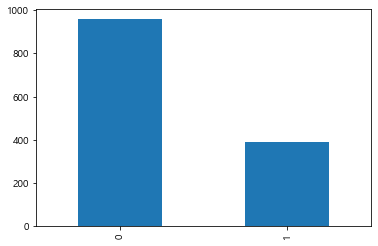

In [17]:
food['골목상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

<AxesSubplot:ylabel='발달상권'>

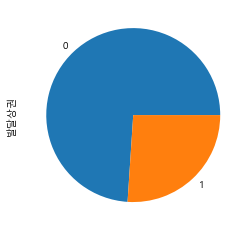

In [18]:
food['발달상권'].value_counts().plot(kind="pie") #범주형 데이터 확인

<AxesSubplot:>

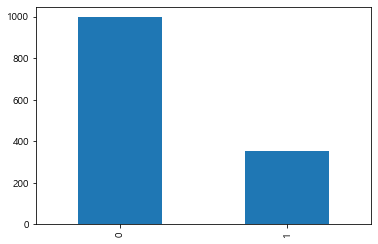

In [19]:
food['발달상권'].value_counts().plot(kind="bar") #범주형 데이터 확인

<AxesSubplot:ylabel='전통시장'>

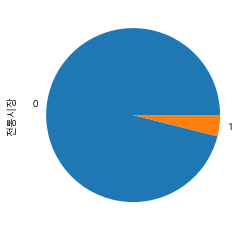

In [20]:
food['전통시장'].value_counts().plot(kind="pie") #범주형 데이터 확인

<AxesSubplot:>

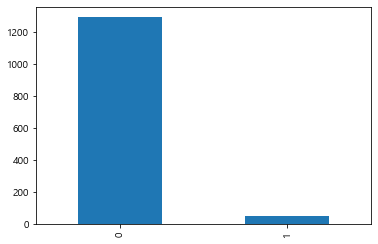

In [21]:
food['전통시장'].value_counts().plot(kind="bar") #범주형 데이터 확인

<AxesSubplot:ylabel='관광특구'>

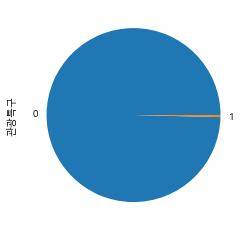

In [22]:
food['관광특구'].value_counts().plot(kind="pie")#범주형 데이터 확인

<AxesSubplot:>

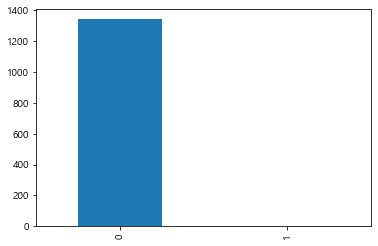

In [23]:
food['관광특구'].value_counts().plot(kind="bar")#범주형 데이터 확인

In [24]:
food['생존여부'].value_counts() #범주형 target 데이터 확인

0    1141
1     207
Name: 생존여부, dtype: int64

<AxesSubplot:ylabel='생존여부'>

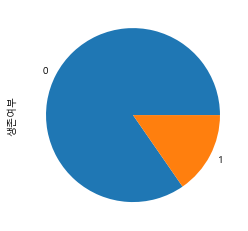

In [25]:
food['생존여부'].value_counts().plot(kind="pie") #원그래프로 범주형 데이터 확인 

<AxesSubplot:>

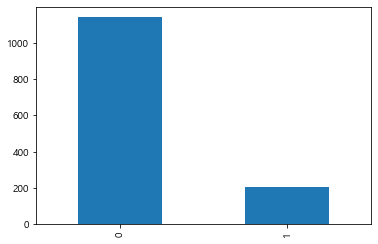

In [26]:
food['생존여부'].value_counts().plot(kind="bar") #막대그래프로 범주형 데이터 확인, 폐업이 더 많이 차지합니다. 데이터가 불균형합니다

In [27]:
food.columns #열이름 확인

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '생존여부', '소재지면적', '아파트 세대수', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '전통시장', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [28]:
#연속형 변수 기초통계량 확인
food[["교통 수","집객시설 수","교육 수","경쟁자 수","인허가 영업","인허가 폐업","인허가 영업+폐업"]].describe()
# 교통 수 제외 모두 이상치 많이 있을 것으로 예상 (mean, min, max, 분산 확인결과)

,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,90.822700,27.295252,198.945846,155.233680,1026.873145,967.132047,1994.005193
std,27.279774,43.539625,185.140820,165.421146,517.398274,506.049451,990.784270
min,14.000000,0.000000,6.000000,2.000000,12.000000,14.000000,26.000000
25%,72.000000,9.000000,100.000000,53.000000,646.750000,619.000000,1260.500000
50%,92.000000,14.000000,141.000000,86.000000,928.000000,849.500000,1789.000000
75%,109.000000,21.000000,246.000000,177.000000,1388.000000,1299.750000,2672.000000
max,169.000000,311.000000,1636.000000,735.000000,2637.000000,2814.000000,5111.000000


In [29]:
#연속형 변수 기초통계량 확인
food[["타업종비율","타업종경쟁자","버퍼내폐업비율","아파트 세대수","임대료","총생활인구수",
      "점심저녁시간대 생활인구수"]].describe()
#타업종비율, 버퍼내폐업비율 제외 모두 이상치 많이 있을 것으로 예상 (mean, min, max, 분산 확인결과)

,타업종비율,타업종경쟁자,버퍼내폐업비율,아파트 세대수,임대료,총생활인구수,점심저녁시간대 생활인구수
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.928642,1838.771513,0.484357,9137.654303,3160.145401,32497.762269,35490.041381
std,0.057470,919.463579,0.058792,6179.571997,4645.939046,17946.432241,23265.595667
min,0.744139,24.000000,0.304603,0.000000,219.000000,4401.522917,3905.885804
25%,0.926135,1204.000000,0.465887,4495.000000,1029.000000,19528.697283,18843.255600
50%,0.953413,1653.000000,0.493468,8322.000000,1915.000000,27256.668330,28056.875490
75%,0.962035,2300.000000,0.522820,11803.000000,3496.000000,41194.877900,47422.941080
max,0.978313,4898.000000,0.666667,36910.000000,68454.000000,108753.472800,134994.908800


C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

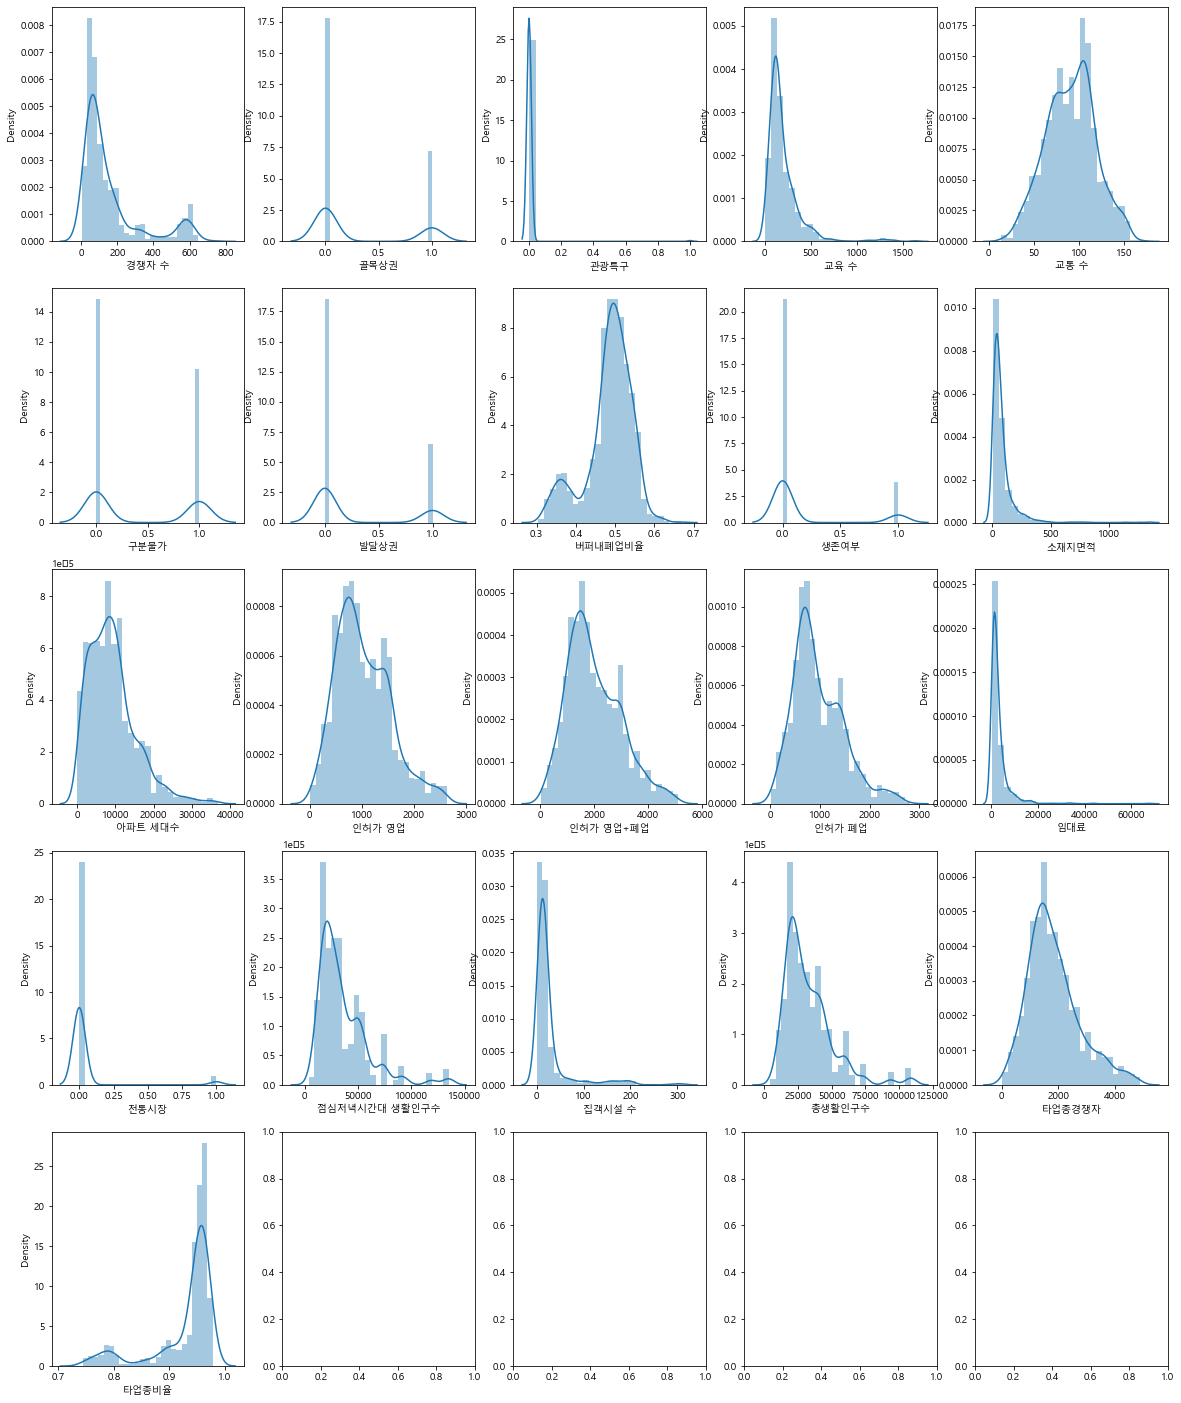

In [30]:
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(food.columns):
    sns.distplot(food[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 
#전체 히스토그램그려보기

In [31]:
for col in food:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(food[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(food[col].kurt())  
         ) #왜도 첨도 확인
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]
#log변환 필요한 변수(왜도가 -1~1 밖의 값) : 경쟁자수, 교육수, 소재지면적, 아파트 세대수, 임대료, 점심저녁시간대 생활인구수, 집객시설 수, 총생활인구수,타업종비율

경쟁자 수           Skewness: 01.77     Kurtosis: 001.99
골목상권            Skewness: 00.93     Kurtosis: -01.14
관광특구            Skewness: 16.35     Kurtosis: 265.59
교육 수            Skewness: 03.57     Kurtosis: 018.12
교통 수            Skewness: -0.03     Kurtosis: -00.33
구분불가            Skewness: 00.38     Kurtosis: -01.86
발달상권            Skewness: 01.09     Kurtosis: -00.81
버퍼내폐업비율         Skewness: -0.92     Kurtosis: 000.66
생존여부            Skewness: 01.92     Kurtosis: 001.70
소재지면적           Skewness: 05.95     Kurtosis: 054.07
아파트 세대수         Skewness: 01.17     Kurtosis: 001.90
인허가 영업          Skewness: 00.66     Kurtosis: 000.17
인허가 영업+폐업       Skewness: 00.64     Kurtosis: 000.03
인허가 폐업          Skewness: 00.85     Kurtosis: 000.60
임대료             Skewness: 06.71     Kurtosis: 069.55
전통시장            Skewness: 04.75     Kurtosis: 020.56
점심저녁시간대 생활인구수   Skewness: 01.95     Kurtosis: 004.74
집객시설 수          Skewness: 03.67     Kurtosis: 014.64
총생활인구수          Skewness: 01.75     Kurtosis: 

In [32]:
#출처 - https://soo-jjeong.tistory.com/122
Afood1=food.copy()
Arob = Afood1[Afood1.columns.difference([ '경쟁자 수','교육 수',  '소재지면적', '아파트 세대수','임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수','타업종비율',
                                 '골목상권','관광특구','구분불가','발달상권','전통시장','생존여부'])] #로버스트스케일링할 데이터
Adis =Afood1[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']] #범주형 변수 데이터
Alog =Afood1[[ '경쟁자 수','교육 수',  '소재지면적', '아파트 세대수','임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수','타업종비율']] #log변환 데이터

In [33]:
Alog.head()#log변환할 데이터

,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종비율
0,60,246,28,17649,713,24802.59456,13,23494.27530,0.956268
1,46,35,54,2580,2172,35491.54168,30,31344.24743,0.966978
2,117,99,50,10730,5589,22107.54510,28,21376.05003,0.948975
3,331,73,40,4583,1372,72929.04225,24,60057.69875,0.886019
4,344,79,31,5076,1063,72929.04225,24,60057.69875,0.881990


In [34]:
Adis.head() #범주형 데이터

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1


In [35]:
Arob.head() #로버스트 스케일링 데이터

,교통 수,버퍼내폐업비율,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자
0,100,0.521137,657,1372,715,1312
1,55,0.430725,793,1393,600,1347
2,95,0.370257,1444,2293,849,2176
3,133,0.502410,1445,2904,1459,2573
4,134,0.504631,1444,2915,1471,2571


In [36]:
Alog.columns #로그변환할 열 이름

Index(['경쟁자 수', '교육 수', '소재지면적', '아파트 세대수', '임대료', '점심저녁시간대 생활인구수', '집객시설 수',
       '총생활인구수', '타업종비율'],
      dtype='object')

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\2542622381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog["경쟁자 수"] = np.log1p(Alog["경쟁자 수"])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.174
Kurtosis: 0.054


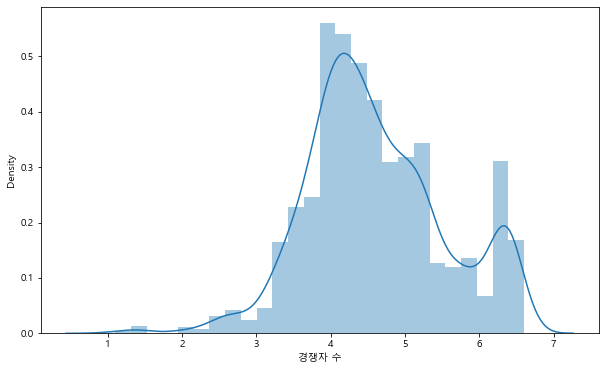

In [37]:
Alog["경쟁자 수"] = np.log1p(Alog["경쟁자 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["경쟁자 수"])

print("Skewness: {:.3f}".format(Alog["경쟁자 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["경쟁자 수"].kurt()))#경쟁자 수 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\4016560294.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog["교육 수"] = np.log1p(Alog["교육 수"])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.161
Kurtosis: 1.154


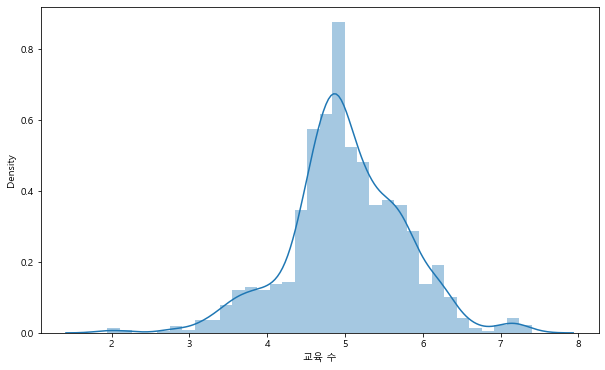

In [38]:
Alog["교육 수"] = np.log1p(Alog["교육 수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["교육 수"])

print("Skewness: {:.3f}".format(Alog["교육 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["교육 수"].kurt()))#교육 수 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\590399749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog["소재지면적"] = np.log1p(Alog["소재지면적"])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.417
Kurtosis: 0.335


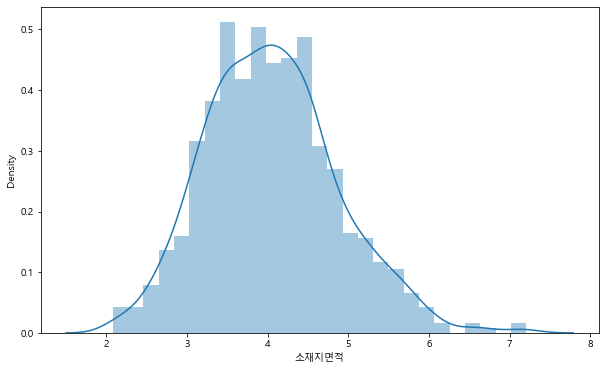

In [39]:
Alog["소재지면적"] = np.log1p(Alog["소재지면적"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["소재지면적"])

print("Skewness: {:.3f}".format(Alog["소재지면적"].skew()))
print("Kurtosis: {:.3f}".format(Alog["소재지면적"].kurt()))#소재지면적 log변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\1652117988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog["아파트 세대수"] = np.log1p(Alog["아파트 세대수"])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.679
Kurtosis: 8.601


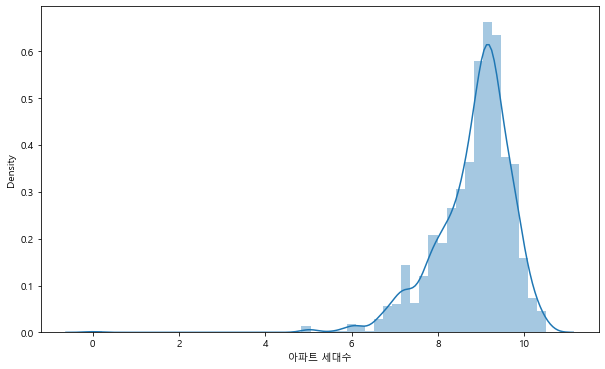

In [40]:
Alog["아파트 세대수"] = np.log1p(Alog["아파트 세대수"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["아파트 세대수"])

print("Skewness: {:.3f}".format(Alog["아파트 세대수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["아파트 세대수"].kurt()))#아파트 세대수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\1347831025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog['임대료'] = np.log1p(Alog['임대료'])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.473
Kurtosis: 0.296


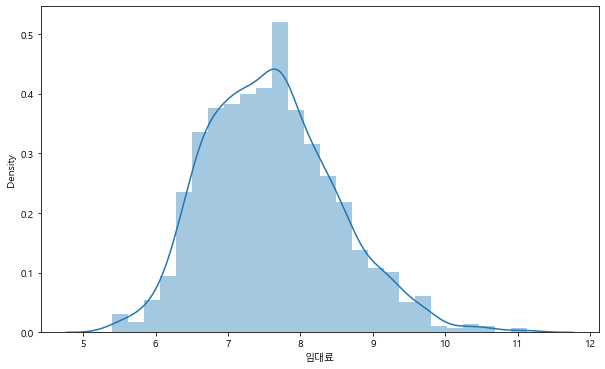

In [41]:
Alog['임대료'] = np.log1p(Alog['임대료'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['임대료'])

print("Skewness: {:.3f}".format(Alog['임대료'].skew()))
print("Kurtosis: {:.3f}".format(Alog['임대료'].kurt())) #임대료 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\4020855875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog['점심저녁시간대 생활인구수'] = np.log1p(Alog['점심저녁시간대 생활인구수'])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.279
Kurtosis: -0.128


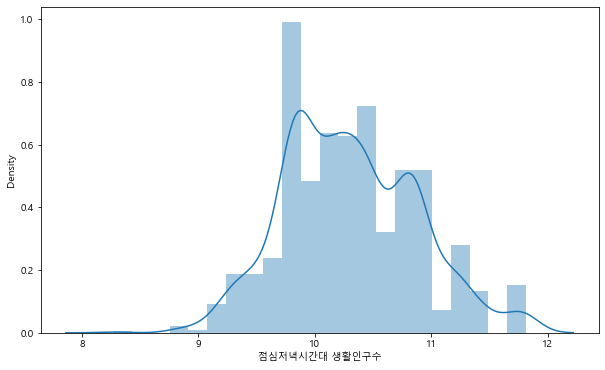

In [42]:
Alog['점심저녁시간대 생활인구수'] = np.log1p(Alog['점심저녁시간대 생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['점심저녁시간대 생활인구수'])

print("Skewness: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].kurt()))#점심저녁시간대 생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\2490512616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog['집객시설 수'] = np.log1p(Alog['집객시설 수'])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.000
Kurtosis: 1.824


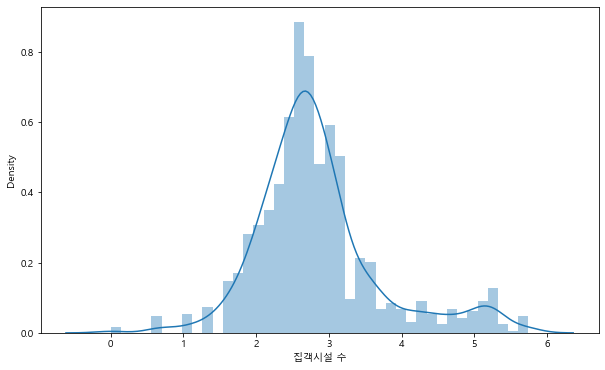

In [43]:
Alog['집객시설 수'] = np.log1p(Alog['집객시설 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['집객시설 수'])

print("Skewness: {:.3f}".format(Alog['집객시설 수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['집객시설 수'].kurt())) #집객시설 수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\157557889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog['총생활인구수'] = np.log1p(Alog['총생활인구수'])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.169
Kurtosis: -0.004


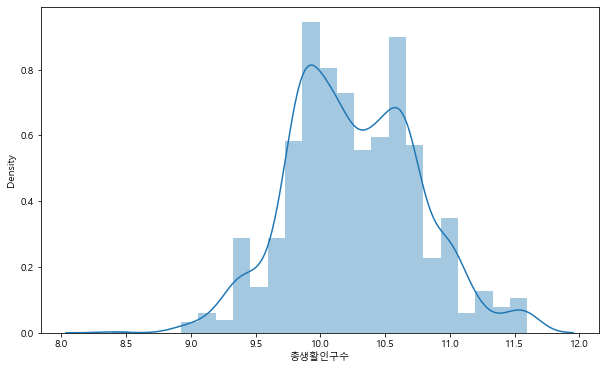

In [44]:
Alog['총생활인구수'] = np.log1p(Alog['총생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['총생활인구수'])

print("Skewness: {:.3f}".format(Alog['총생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['총생활인구수'].kurt()))#총생활인구수 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

C:\Users\i0797\AppData\Local\Temp\ipykernel_11180\2979991161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alog['타업종비율'] = np.log1p(Alog['타업종비율'])
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.887
Kurtosis: 2.351


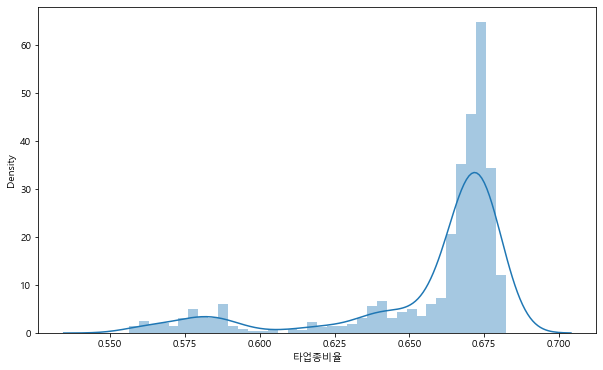

In [45]:
Alog['타업종비율'] = np.log1p(Alog['타업종비율'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['타업종비율'])

print("Skewness: {:.3f}".format(Alog['타업종비율'].skew()))
print("Kurtosis: {:.3f}".format(Alog['타업종비율'].kurt()))#타업종비율 log 변환
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

In [46]:
Alog.head() #결과

,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종비율
0,4.110874,5.509388,3.367296,9.778491,6.570883,10.118744,2.639057,10.064555,0.671039
1,3.850148,3.583519,4.007333,7.855932,7.683864,10.477078,3.433987,10.352818,0.676498
2,4.770685,4.605170,3.931826,9.280892,8.628735,10.003719,3.367296,9.970073,0.667304
3,5.805135,4.304065,3.713572,8.430327,7.224753,11.197256,3.218876,11.003078,0.634468
4,5.843544,4.382027,3.465736,8.532476,6.969791,11.197256,3.218876,11.003078,0.632330


In [47]:
scaler = RobustScaler() #로버스트 스케일링
df_robust = scaler.fit_transform(Arob)

In [48]:
robust = pd.DataFrame(df_robust, columns =Arob.columns) #스케일링값 데이터프레임 화

In [49]:
robust

,교통 수,버퍼내폐업비율,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자
0,0.216216,0.485998,-0.365599,-0.295430,-0.197576,-0.311131
1,-1.000000,-1.102038,-0.182125,-0.280553,-0.366508,-0.279197
2,0.081081,-2.164121,0.696121,0.357067,-0.000734,0.477190
3,1.108108,0.157076,0.697470,0.789940,0.895336,0.839416
4,1.135135,0.196083,0.696121,0.797733,0.912964,0.837591
...,...,...,...,...,...,...
1343,-0.891892,0.691177,-1.088702,-1.083953,-1.045171,-1.282847
1344,-0.216216,0.637011,0.134907,0.281261,0.453177,0.415146
1345,-0.216216,0.400517,-0.209106,-0.135317,-0.035990,-0.102190
1346,-0.108108,0.667099,0.446543,0.636203,0.849798,0.852190


In [50]:
robust[[ '경쟁자 수','교육 수','소재지면적','아파트 세대수','임대료','점심저녁시간대 생활인구수','집객시설 수',
              '총생활인구수','타업종비율']]=Alog #연속형 변수끼리 합치기

In [51]:
robust

,교통 수,버퍼내폐업비율,인허가 영업,인허가 영업+폐업,인허가 폐업,타업종경쟁자,경쟁자 수,교육 수,소재지면적,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종비율
0,0.216216,0.485998,-0.365599,-0.295430,-0.197576,-0.311131,4.110874,5.509388,3.367296,9.778491,6.570883,10.118744,2.639057,10.064555,0.671039
1,-1.000000,-1.102038,-0.182125,-0.280553,-0.366508,-0.279197,3.850148,3.583519,4.007333,7.855932,7.683864,10.477078,3.433987,10.352818,0.676498
2,0.081081,-2.164121,0.696121,0.357067,-0.000734,0.477190,4.770685,4.605170,3.931826,9.280892,8.628735,10.003719,3.367296,9.970073,0.667304
3,1.108108,0.157076,0.697470,0.789940,0.895336,0.839416,5.805135,4.304065,3.713572,8.430327,7.224753,11.197256,3.218876,11.003078,0.634468
4,1.135135,0.196083,0.696121,0.797733,0.912964,0.837591,5.843544,4.382027,3.465736,8.532476,6.969791,11.197256,3.218876,11.003078,0.632330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,-0.891892,0.691177,-1.088702,-1.083953,-1.045171,-1.282847,2.564949,4.615121,4.543295,9.857705,8.503500,9.902698,1.386294,9.932289,0.669709
1344,-0.216216,0.637011,0.134907,0.281261,0.453177,0.415146,4.369448,5.327876,3.784190,8.749891,7.340187,10.192388,2.890372,10.302994,0.675145
1345,-0.216216,0.400517,-0.209106,-0.135317,-0.035990,-0.102190,4.060443,5.918894,3.258097,9.275004,6.797940,10.192388,2.564949,10.302994,0.675151
1346,-0.108108,0.667099,0.446543,0.636203,0.849798,0.852190,4.615121,5.198497,3.295837,9.019543,6.689599,10.193846,3.044522,10.237306,0.674364


C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\i0797\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

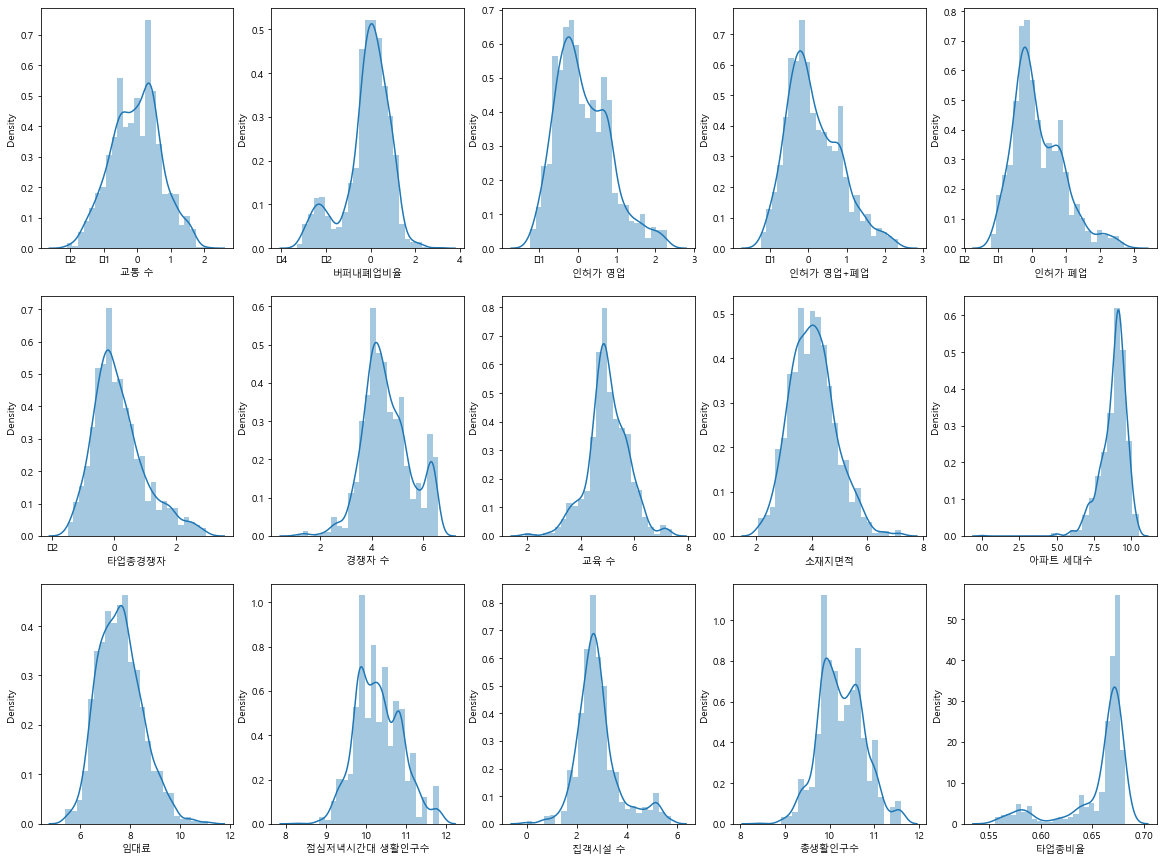

In [52]:
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i,col in enumerate(robust.columns):
    sns.distplot(robust[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#연속형변수 전체 히스토그램그려보기    
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

# 다중공선성 확인

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

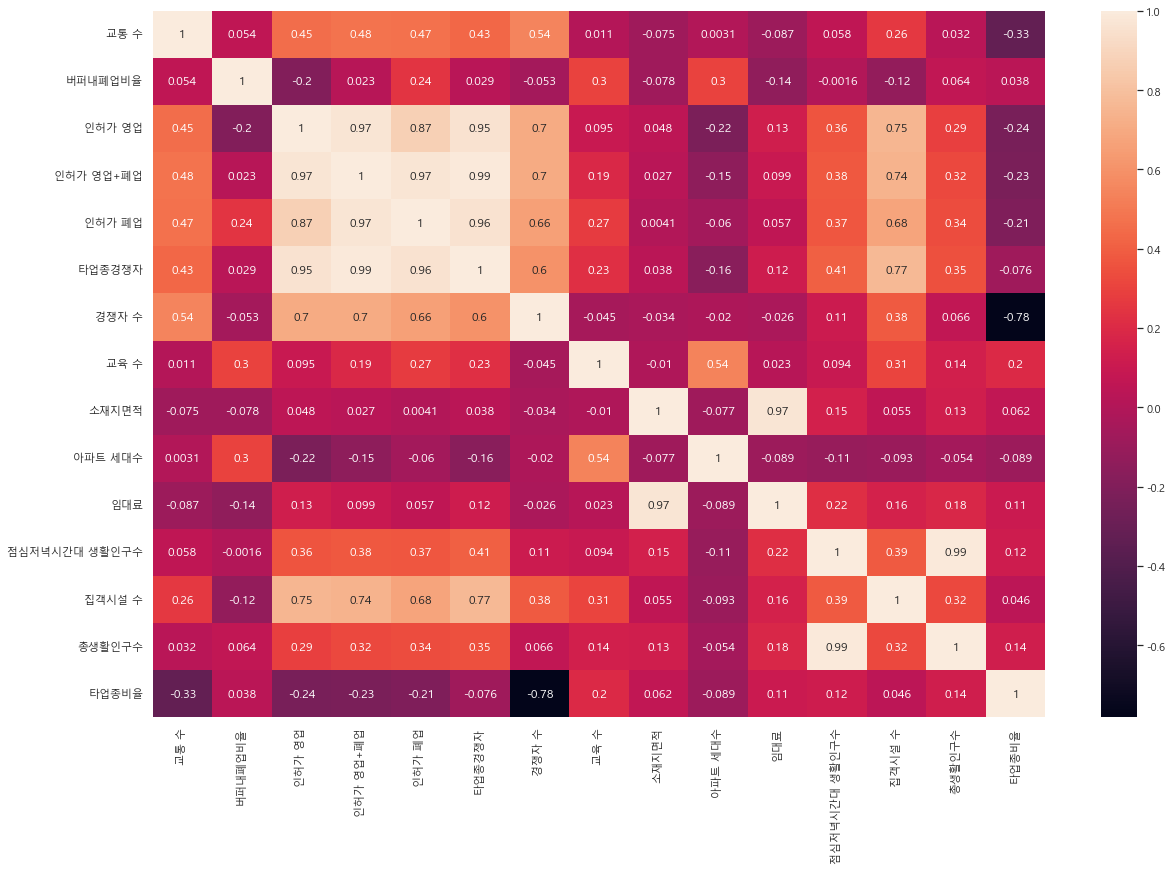

In [64]:
#주피터용
#히트맵그리기
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "Malgun Gothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="Malgun Gothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [ ]:
#코랩용
#히트맵그리기
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
#plt.rc("font", family = "Malgun Gothic")
#sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="NanumGothic", style='white')
#sns.heatmap(robust.corr(), annot = True) 
#plt.show()

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#변수 별 vif 확인
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(robust.values, i) for i in range(robust.shape[1])] #x_data.shape[1]는 변수를 뜻함
vif['features'] = robust.columns
vif

,VIF Factor,features
0,1.567602e+00,교통 수
1,4.492040e+00,버퍼내폐업비율
2,3.995285e+07,인허가 영업
3,1.480548e+08,인허가 영업+폐업
4,3.885358e+07,인허가 폐업
5,1.118843e+03,타업종경쟁자
6,1.170706e+01,경쟁자 수
7,2.218673e+00,교육 수
8,2.646978e+01,소재지면적
9,1.871569e+00,아파트 세대수


In [66]:
#위 결과를 바탕으로 vif가 가장 높은 인허가 영업+폐업 칼럼 제거
vif = pd.DataFrame()
x_data2 = robust.drop('인허가 영업+폐업', axis=1) #칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,1.549582,교통 수
1,4.577998,버퍼내폐업비율
2,124.256028,인허가 영업
3,139.530880,인허가 폐업
4,350.623476,타업종경쟁자
5,213.220165,경쟁자 수
6,101.286098,교육 수
7,654.557925,소재지면적
8,192.417119,아파트 세대수
9,2019.379818,임대료


In [67]:
#위 결과를 바탕으로 vif가 가장 높은 인허가 영업 칼럼 제거
vif = pd.DataFrame()
x_data3 = x_data2.drop('인허가 영업', axis=1) #칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,1.549425,교통 수
1,4.271702,버퍼내폐업비율
2,76.985527,인허가 폐업
3,69.688682,타업종경쟁자
4,81.724791,경쟁자 수
5,98.844748,교육 수
6,629.084691,소재지면적
7,191.952669,아파트 세대수
8,1927.893130,임대료
9,27888.243913,점심저녁시간대 생활인구수


In [68]:
#위에 결과를 바탕으로 vif가 가장 높은 인허가 폐업 칼럼 제거
vif = pd.DataFrame()
x_data4 = x_data3.drop('인허가 폐업', axis=1) #칼럼을 제거
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,1.549372,교통 수
1,1.482583,버퍼내폐업비율
2,4.151583,타업종경쟁자
3,68.637686,경쟁자 수
4,98.608809,교육 수
5,629.083842,소재지면적
6,191.657817,아파트 세대수
7,1927.887602,임대료
8,24792.504016,점심저녁시간대 생활인구수
9,37.665179,집객시설 수


In [69]:
#vif가 가장 높은 칼럼은 임대료이지만 임대료와 가장 상관관계가 클 것으로 예상되는 소재지면적이 개별데이터가 아닌 행정데이터임을 고려하여 소재지면적 제거
vif = pd.DataFrame()
x_data5 = x_data4.drop('소재지면적', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,1.508488,교통 수
1,1.427074,버퍼내폐업비율
2,4.150883,타업종경쟁자
3,62.915535,경쟁자 수
4,98.437027,교육 수
5,187.812802,아파트 세대수
6,81.673924,임대료
7,23823.244639,점심저녁시간대 생활인구수
8,37.302065,집객시설 수
9,28630.119628,총생활인구수


In [70]:
#위 결과를 바탕으로 vif가 가장 높은 총생활인구수 칼럼 제거
vif = pd.DataFrame()
x_data6 = x_data5.drop('총생활인구수', axis=1) #칼럼을 제거, 이 이상 제거는 로지스틱 분석 후 검토
vif["VIF Factor"] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]
vif['features'] = x_data6.columns
vif

,VIF Factor,features
0,1.505252,교통 수
1,1.320175,버퍼내폐업비율
2,3.913304,타업종경쟁자
3,54.409847,경쟁자 수
4,92.680259,교육 수
5,184.188989,아파트 세대수
6,79.974976,임대료
7,392.339209,점심저녁시간대 생활인구수
8,34.241608,집객시설 수
9,363.730956,타업종비율


In [71]:
x_data6#vif 기준, 변수 삭제 후 데이터

,교통 수,버퍼내폐업비율,타업종경쟁자,경쟁자 수,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,0.216216,0.485998,-0.311131,4.110874,5.509388,9.778491,6.570883,10.118744,2.639057,0.671039
1,-1.000000,-1.102038,-0.279197,3.850148,3.583519,7.855932,7.683864,10.477078,3.433987,0.676498
2,0.081081,-2.164121,0.477190,4.770685,4.605170,9.280892,8.628735,10.003719,3.367296,0.667304
3,1.108108,0.157076,0.839416,5.805135,4.304065,8.430327,7.224753,11.197256,3.218876,0.634468
4,1.135135,0.196083,0.837591,5.843544,4.382027,8.532476,6.969791,11.197256,3.218876,0.632330
...,...,...,...,...,...,...,...,...,...,...
1343,-0.891892,0.691177,-1.282847,2.564949,4.615121,9.857705,8.503500,9.902698,1.386294,0.669709
1344,-0.216216,0.637011,0.415146,4.369448,5.327876,8.749891,7.340187,10.192388,2.890372,0.675145
1345,-0.216216,0.400517,-0.102190,4.060443,5.918894,9.275004,6.797940,10.192388,2.564949,0.675151
1346,-0.108108,0.667099,0.852190,4.615121,5.198497,9.019543,6.689599,10.193846,3.044522,0.674364


In [72]:
Adis #범주형 데이터

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1
...,...,...,...,...,...,...
1343,0,0,1,0,0,0
1344,0,0,1,0,0,0
1345,0,0,1,0,0,0
1346,0,0,1,0,0,0


In [73]:
x_data6[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']]=Adis #범주형변수 추가

In [74]:
x_data6.head()

,교통 수,버퍼내폐업비율,타업종경쟁자,경쟁자 수,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,0.216216,0.485998,-0.311131,4.110874,5.509388,9.778491,6.570883,10.118744,2.639057,0.671039,1,0,0,0,0,0
1,-1.000000,-1.102038,-0.279197,3.850148,3.583519,7.855932,7.683864,10.477078,3.433987,0.676498,1,0,0,0,0,0
2,0.081081,-2.164121,0.477190,4.770685,4.605170,9.280892,8.628735,10.003719,3.367296,0.667304,1,0,0,0,0,1
3,1.108108,0.157076,0.839416,5.805135,4.304065,8.430327,7.224753,11.197256,3.218876,0.634468,1,0,0,0,0,1
4,1.135135,0.196083,0.837591,5.843544,4.382027,8.532476,6.969791,11.197256,3.218876,0.632330,1,0,0,0,0,1


## 로지스틱 회귀분석 준비

In [76]:
Chinese = sm.add_constant(x_data6, has_constant="add")#데이터에 상수항 추가
Chinese.head()

,const,교통 수,버퍼내폐업비율,타업종경쟁자,경쟁자 수,교육 수,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1.0,0.216216,0.485998,-0.311131,4.110874,5.509388,9.778491,6.570883,10.118744,2.639057,0.671039,1,0,0,0,0,0
1,1.0,-1.000000,-1.102038,-0.279197,3.850148,3.583519,7.855932,7.683864,10.477078,3.433987,0.676498,1,0,0,0,0,0
2,1.0,0.081081,-2.164121,0.477190,4.770685,4.605170,9.280892,8.628735,10.003719,3.367296,0.667304,1,0,0,0,0,1
3,1.0,1.108108,0.157076,0.839416,5.805135,4.304065,8.430327,7.224753,11.197256,3.218876,0.634468,1,0,0,0,0,1
4,1.0,1.135135,0.196083,0.837591,5.843544,4.382027,8.532476,6.969791,11.197256,3.218876,0.632330,1,0,0,0,0,1


In [77]:
#변수 구분
feature_columns = list(Chinese.columns.difference(['생존여부']))
x1= Chinese[feature_columns]
y1= Chinese['생존여부'] #폐업 0, 5년이상생존 1

In [78]:
#데이터구분
x_train, x_test, y_train, y_test = train_test_split(x1,y1,
                                                   train_size=0.7, test_size=0.3,
                                                   random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(943, 16) (405, 16) (943,) (405,)


In [80]:
#train 데이터 셋의 종속변수 확인
y_train.value_counts() #불균형

0    798
1    145
Name: 생존여부, dtype: int64

# 오버샘플링

In [81]:
from imblearn.over_sampling import SMOTE

In [82]:
method=SMOTE()

In [83]:
X_resampled,y_resampled=method.fit_resample(x_train,y_train) #오버샘플링

In [84]:
X_resampled.shape

(1596, 16)

In [85]:
y_resampled.value_counts() #균형다시맞춤

0    798
1    798
Name: 생존여부, dtype: int64

In [86]:
x_train=X_resampled #결과 다시 x_train변수에 담기

In [87]:
y_train=y_resampled#결과 다시 y_train변수에 담기

In [88]:
x_train.shape

(1596, 16)

In [89]:
y_train.value_counts() #균형다시맞춤

0    798
1    798
Name: 생존여부, dtype: int64

# 로지스틱 회귀분석 시작

In [90]:
#모델생성
model = sm.Logit(y_train,x_train)
results = model.fit(method = "newton")

         Current function value: 0.564865
         Iterations: 35


C:\Users\i0797\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [93]:
#결과확인
results.summary() # '골목상권', '관광특구', 구분불가', '발달상권', '전통시장','경쟁자 수','타업종비율'제거 필요

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 1596
Model:                          Logit   Df Residuals:                     1580
Method:                           MLE   Df Model:                           15
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                  0.1851
Time:                        14:24:02   Log-Likelihood:                -901.52
converged:                      False   LL-Null:                       -1106.3
Covariance Type:            nonrobust   LLR p-value:                 7.046e-78
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6338      8.901     -0.184      0.854     -19.080      15.813
경쟁자 수             0.1009      0.220      0.458      0.647      -0.331       0.532
골목상권             -9.5537      7.723     -1.237      0.216     -24.691       5.584
관광특구            -39.3988   2.09e+06  -1.89e-05      1.000   -4.09e+06    4.09e+06
교육 수              0.2859      0.119      2.404      0.016       0.053       0.519
교통 수              0.4347      0.097      4.471      0.000       0.244       0.625
구분불가             -9.5460      7.723     -1.236      0.216     -24.683       5.591
발달상권             -9.8355      7.724     -1.273      0.203     -24.974       5.303
버퍼내폐업비율           0.1425      0.064      2.213      0.027       0.016       0.269
아파트 세대수          -0.1913      0.095     -2.019      0.044      -0.377      -0.006
임대료               0.5753      0.071      8.146      0.000       0.437       0.714
전통시장            -10.9057      7.734     -1.410      0.159     -26.064       4.253
점심저녁시간대 생활인구수     0.3165      0.120      2.634      0.008       0.081       0.552
집객시설 수            0.2230      0.124      1.794      0.073      -0.021       0.467
타업종경쟁자           -0.6557      0.180     -3.641      0.000      -1.009      -0.303
타업종비율             3.8899      5.255      0.740      0.459      -6.410      14.190
=================================================================================
"""

In [94]:
results.params

const            -1.633757
경쟁자 수             0.100897
골목상권             -9.553701
관광특구            -39.398840
교육 수              0.285895
교통 수              0.434667
구분불가             -9.546019
발달상권             -9.835530
버퍼내폐업비율           0.142480
아파트 세대수          -0.191307
임대료               0.575273
전통시장            -10.905667
점심저녁시간대 생활인구수     0.316485
집객시설 수            0.222961
타업종경쟁자           -0.655694
타업종비율             3.889857
dtype: float64

In [95]:
np.exp(results.params)

const            1.951948e-01
경쟁자 수            1.106163e+00
골목상권             7.093820e-05
관광특구             7.749989e-18
교육 수             1.330953e+00
교통 수             1.544449e+00
구분불가             7.148526e-05
발달상권             5.351600e-05
버퍼내폐업비율          1.153130e+00
아파트 세대수          8.258786e-01
임대료              1.777616e+00
전통시장             1.835393e-05
점심저녁시간대 생활인구수    1.372295e+00
집객시설 수           1.249772e+00
타업종경쟁자           5.190816e-01
타업종비율            4.890390e+01
dtype: float64

In [96]:
#예측
y_pred = results.predict(x_test)
y_pred

544     0.197247
682     0.505727
832     0.464479
49      0.722139
124     0.398873
          ...   
428     0.281944
185     0.483445
1077    0.389030
871     0.306923
42      0.302303
Length: 405, dtype: float64

In [103]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))
#임계값 0.7
Y_pred = PRED(y_pred,0.7)
Y_pred

544     0
682     0
832     0
49      1
124     0
       ..
428     0
185     0
1077    0
871     0
42      0
Length: 405, dtype: int32

In [104]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[335   8]
 [ 59   3]]


In [105]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [106]:
acc(cfmat) #정확도

0.8345679012345679

In [107]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='weighted') 

In [108]:
#accuracy, f1-score 확인
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}") 

f1:0.782504 accuracy:0.8346


# 로지스틱 변수 재설계 후 예측

In [109]:
x_trainf = x_train.columns.difference(x_train[['골목상권', '관광특구', '구분불가', '발달상권', '전통시장','경쟁자 수','타업종비율']].columns)
x_train2 = x_train[x_trainf] #훈련데이터에서 변수 선택

In [110]:
x_train2.head()

,const,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자
0,1.0,4.709530,-0.405405,0.881860,8.560636,6.154858,10.236712,2.302585,-0.364051
1,1.0,5.327876,-0.432432,0.362766,9.138844,6.695799,10.920147,2.302585,0.007299
2,1.0,4.779123,-0.675676,-1.867190,9.022202,9.048174,11.686371,2.639057,0.189781
3,1.0,4.615121,-0.135135,0.658012,8.241967,6.583409,9.936729,2.397895,0.205292
4,1.0,7.210818,-0.567568,0.042397,10.063052,9.199178,10.295553,3.218876,0.620438


In [111]:
x_testf = x_test.columns.difference(x_test[['골목상권', '관광특구', '구분불가', '발달상권', '전통시장','경쟁자 수','타업종비율']].columns)
x_test2 = x_test[x_testf]#테스트데이터에서 똑같이 반영

In [112]:
x_test2.head()

,const,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자
544,1.0,6.061457,0.405405,0.525164,9.155779,5.852202,10.814242,5.273000,1.910584
682,1.0,4.653960,1.162162,-2.320387,7.049255,8.473450,10.603360,4.820282,1.667883
832,1.0,4.828314,0.378378,0.956869,9.570738,7.682022,9.381573,1.098612,-0.927920
49,1.0,5.075174,-1.621622,0.040024,9.375940,9.661225,10.819204,4.369448,-0.354927
124,1.0,4.317488,0.864865,0.268224,8.674880,7.443664,10.785086,3.091042,0.927920


In [113]:
#모델생성
model = sm.Logit(y_train,x_train2)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.655687
         Iterations 5


In [114]:
#결과확인
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 1596
Model:                          Logit   Df Residuals:                     1587
Method:                           MLE   Df Model:                            8
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.05404
Time:                        14:24:35   Log-Likelihood:                -1046.5
converged:                       True   LL-Null:                       -1106.3
Covariance Type:            nonrobust   LLR p-value:                 4.063e-22
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -7.7350      1.292     -5.987      0.000     -10.267      -5.203
교육 수              0.2667      0.101      2.629      0.009       0.068       0.465
교통 수              0.2952      0.082      3.583      0.000       0.134       0.457
버퍼내폐업비율           0.0928      0.059      1.578      0.115      -0.022       0.208
아파트 세대수          -0.1818      0.082     -2.209      0.027      -0.343      -0.020
임대료               0.5407      0.065      8.275      0.000       0.413       0.669
점심저녁시간대 생활인구수     0.3490      0.106      3.280      0.001       0.140       0.557
집객시설 수            0.1007      0.110      0.913      0.361      -0.115       0.317
타업종경쟁자           -0.5125      0.116     -4.403      0.000      -0.741      -0.284
=================================================================================
"""

In [115]:
results.params

const           -7.734979
교육 수             0.266669
교통 수             0.295188
버퍼내폐업비율          0.092784
아파트 세대수         -0.181835
임대료              0.540736
점심저녁시간대 생활인구수    0.348960
집객시설 수           0.100696
타업종경쟁자          -0.512532
dtype: float64

In [116]:
np.exp(results.params)

const            0.000437
교육 수             1.305608
교통 수             1.343379
버퍼내폐업비율          1.097224
아파트 세대수          0.833739
임대료              1.717271
점심저녁시간대 생활인구수    1.417593
집객시설 수           1.105941
타업종경쟁자           0.598977
dtype: float64

In [117]:
#예측
y_pred = results.predict(x_test2)
y_pred

544     0.245077
682     0.565777
832     0.506679
49      0.742712
124     0.436210
          ...   
428     0.416511
185     0.524348
1077    0.466282
871     0.340967
42      0.364232
Length: 405, dtype: float64

In [118]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))
#임계값 0.7
Y_pred = PRED(y_pred,0.7)
Y_pred

544     0
682     0
832     0
49      1
124     0
       ..
428     0
185     0
1077    0
871     0
42      0
Length: 405, dtype: int32

In [119]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[333  10]
 [ 58   4]]


In [120]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [121]:
acc(cfmat) #정확도

0.8320987654320988

In [122]:
 #f1-score
f1 = f1_score(y_test, Y_pred, average='weighted')

In [123]:
#accuracy, f1-score 출력
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}") 

f1:0.784567 accuracy:0.8321


# KNN

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
#적절한 k찾기
test_acc=[]
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train2,y_train)
    y_pred=clf.predict(x_test2)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.725925925925926
k: 2, 정확도: 0.7604938271604939
k: 3, 정확도: 0.691358024691358
k: 4, 정확도: 0.7506172839506173
k: 5, 정확도: 0.6790123456790124
k: 6, 정확도: 0.7061728395061728
k: 7, 정확도: 0.6320987654320988
k: 8, 정확도: 0.6888888888888889
k: 9, 정확도: 0.6395061728395062


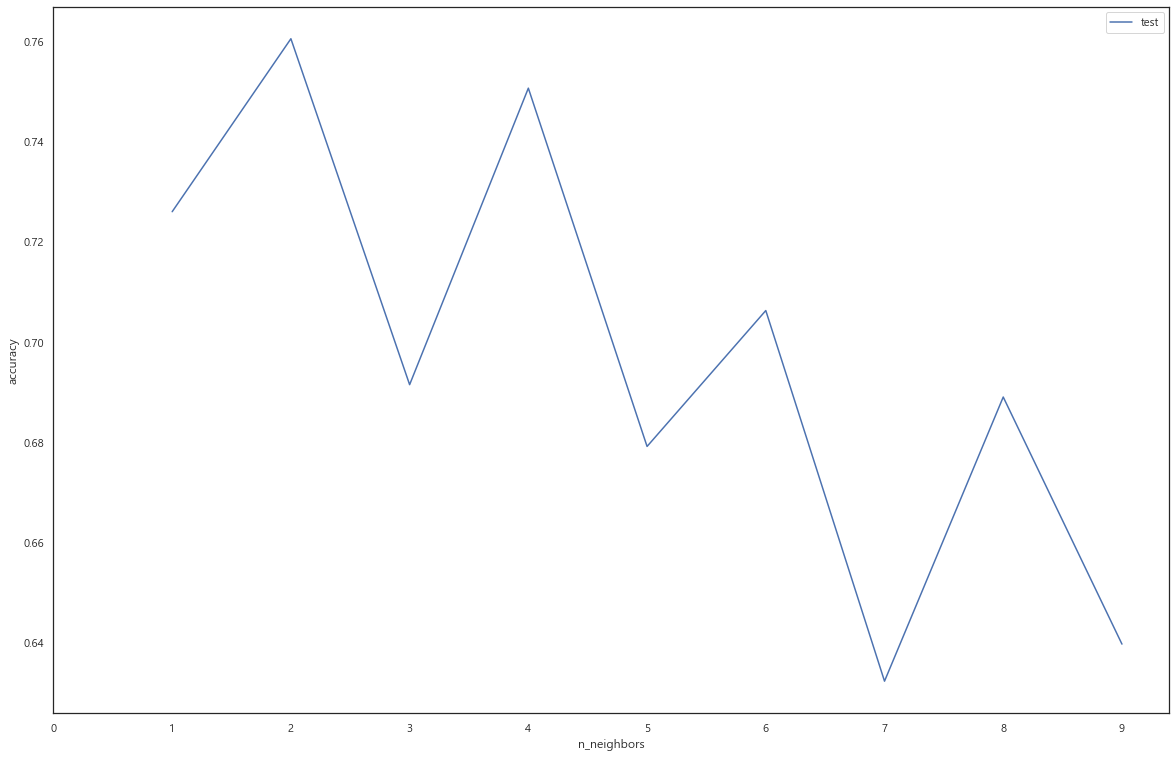

In [126]:
import numpy as np
import matplotlib.pyplot as plt
#k별로 정확도 비교
plt.figure()
plt.plot(range(1,10),test_acc,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,10,step=1))
plt.legend()
plt.show()

In [127]:
clf=KNeighborsClassifier(2)
clf.fit(x_train2,y_train)#knn 학습, k=2 지정

KNeighborsClassifier(n_neighbors=2)

In [128]:
y_pred=clf.predict(x_test2)#예측

In [129]:
cmat=confusion_matrix(y_test,y_pred)
print(cmat)#성능 확인

[[292  51]
 [ 46  16]]


In [130]:
acc=accuracy_score(y_test,y_pred)
acc #accuracy

0.7604938271604939

In [131]:
#f1-score
f1 = f1_score(y_test, y_pred, average='weighted') 

In [132]:
#accuracy, f1-score 출력
print(f"f1:{f1:4f} accuracy:{acc:.4f}") #f1:0.771809 accuracy:0.7654

f1:0.764256 accuracy:0.7605


# 랜덤포레스트

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#파라미터 지정
rf_clf = RandomForestClassifier(n_estimators = 100,
                               max_depth = 15,
                                n_jobs = -1,
                                 verbose = 1,
                               random_state = 101)
#랜덤포레스트 학습
rf_clf.fit(x_train2, y_train)
pred = rf_clf.predict(x_test2)
#정확도, f1-score 확인
accuracy = accuracy_score(y_test, pred) 
f1 = f1_score(y_test,pred,average='weighted') 

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}") 

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s


f1:0.770054 accuracy:0.7630


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[290  53]
 [ 43  19]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators' : [100, 200],
          'max_depth' : [6, 8, 10, 12],
         'min_samples_leaf' : [8,12,18],
         'min_samples_split' : [8, 16, 20]}

rf_clf4 = RandomForestClassifier(random_state = 103,
                                 n_jobs = -1,
                                 verbose = 1)
grid_cv1 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3)

grid_cv1.fit(x_train2, y_train)

grid_cv2 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3,
                       scoring='f1')

grid_cv2.fit(x_train2, y_train)
#f1스코어 모델 기준 예측값
pred=grid_cv2.predict(x_test2)

print('최적 하이퍼 마라미터: ', grid_cv1.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv1.best_score_))
print('최적 하이퍼 마라미터: ', grid_cv2.best_params_)
print('최고 f1-score: {:.4f}'.format(grid_cv2.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.6s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도: 0.7776
최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 f1-score: 0.7806


[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
#gridcv 성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[266  77]
 [ 37  25]]


# boosting - xgboost

In [143]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

# 검증 데이터 넣어주어서 교차검증 해보도록하기
evals = [(x_test2, y_test)]
#파라미터지정 
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train2, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')
#예측
preds = xgb_wrapper.predict(x_test2)
preds_proba = xgb_wrapper.predict_proba(x_test2)[:, 1]
print(preds_proba[:10])
#정확도, f1-score 확인
accuracy = accuracy_score(y_test,preds)
f1 = f1_score(y_test,preds,average='weighted')

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")  #f1:0.749191 accuracy:0.7407

[0]	validation_0-logloss:0.68484
[1]	validation_0-logloss:0.67994
[2]	validation_0-logloss:0.67322
[3]	validation_0-logloss:0.66952
[4]	validation_0-logloss:0.66537
[5]	validation_0-logloss:0.65960
[6]	validation_0-logloss:0.65674
[7]	validation_0-logloss:0.65343
[8]	validation_0-logloss:0.64964
[9]	validation_0-logloss:0.64648
[10]	validation_0-logloss:0.64484
[11]	validation_0-logloss:0.64296
[12]	validation_0-logloss:0.63927
[13]	validation_0-logloss:0.63847
[14]	validation_0-logloss:0.63666
[15]	validation_0-logloss:0.63238
[16]	validation_0-logloss:0.62930
[17]	validation_0-logloss:0.62773
[18]	validation_0-logloss:0.62723
[19]	validation_0-logloss:0.62674
[20]	validation_0-logloss:0.62509
[21]	validation_0-logloss:0.62180
[22]	validation_0-logloss:0.62167
[23]	validation_0-logloss:0.61854
[24]	validation_0-logloss:0.61614
[25]	validation_0-logloss:0.61530
[26]	validation_0-logloss:0.61329
[27]	validation_0-logloss:0.61217
[28]	validation_0-logloss:0.61188
[29]	validation_0-loglos

C:\Users\i0797\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\i0797\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[31]	validation_0-logloss:0.60644
[32]	validation_0-logloss:0.60569
[33]	validation_0-logloss:0.60521
[34]	validation_0-logloss:0.60585
[35]	validation_0-logloss:0.60609
[36]	validation_0-logloss:0.60550
[37]	validation_0-logloss:0.60480
[38]	validation_0-logloss:0.60462
[39]	validation_0-logloss:0.60327
[40]	validation_0-logloss:0.60075
[41]	validation_0-logloss:0.59941
[42]	validation_0-logloss:0.59638
[43]	validation_0-logloss:0.59516
[44]	validation_0-logloss:0.59280
[45]	validation_0-logloss:0.59289
[46]	validation_0-logloss:0.59262
[47]	validation_0-logloss:0.59081
[48]	validation_0-logloss:0.59019
[49]	validation_0-logloss:0.58976
[50]	validation_0-logloss:0.58706
[51]	validation_0-logloss:0.58581
[52]	validation_0-logloss:0.58384
[53]	validation_0-logloss:0.58339
[54]	validation_0-logloss:0.58207
[55]	validation_0-logloss:0.58058
[56]	validation_0-logloss:0.58033
[57]	validation_0-logloss:0.57975
[58]	validation_0-logloss:0.57937
[59]	validation_0-logloss:0.57954
[60]	validatio

[268]	validation_0-logloss:0.51154
[269]	validation_0-logloss:0.51129
[270]	validation_0-logloss:0.51117
[271]	validation_0-logloss:0.51246
[272]	validation_0-logloss:0.51179
[273]	validation_0-logloss:0.51219
[274]	validation_0-logloss:0.51198
[275]	validation_0-logloss:0.51209
[276]	validation_0-logloss:0.51219
[277]	validation_0-logloss:0.51218
[278]	validation_0-logloss:0.51209
[279]	validation_0-logloss:0.51249
[280]	validation_0-logloss:0.51203
[281]	validation_0-logloss:0.51236
[282]	validation_0-logloss:0.51205
[283]	validation_0-logloss:0.51193
[284]	validation_0-logloss:0.51156
[285]	validation_0-logloss:0.51171
[286]	validation_0-logloss:0.51185
[287]	validation_0-logloss:0.51180
[288]	validation_0-logloss:0.51169
[289]	validation_0-logloss:0.51179
[290]	validation_0-logloss:0.51147
[291]	validation_0-logloss:0.51031
[292]	validation_0-logloss:0.51069
[293]	validation_0-logloss:0.51034
[294]	validation_0-logloss:0.51069
[295]	validation_0-logloss:0.51148
[296]	validation_0-l

In [144]:
#성능확인
cmat = confusion_matrix(y_test,preds)
print(cmat)

[[298  45]
 [ 42  20]]


In [145]:
xgb_wrapper.predict(x_test2)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [135]:
print("##########################################")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,8,10,15] ,
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05, 0.1],
    'gamma': [0.5,1,2,3], 
    'colsample_bytree' : [0.8,0.9],
    'random_state':[99]
}


grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(x_train2, y_train)
grid_cv2 = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid_cv2.fit(x_train2, y_train)

pred = grid_cv2.predict(x_test2) #f1스코어기준 모델의 예측값

print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)
print("최적의 파라미터:", grid_cv2.best_params_)
print("최고의 f1socre :", grid_cv2.best_score_)

##########################################
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
최적의 파라미터: {'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 정확도 : 0.8389724310776941
최적의 파라미터: {'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 f1socre : 0.8407125038027526


In [136]:
cmat=confusion_matrix(y_test,pred)
print(cmat) #f1스코어기준 혼동행렬

[[305  38]
 [ 46  16]]


In [140]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Malgun Gothic'

In [141]:
#코랩에서
#plt.rc('font', family='NanumBarunGothic') 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

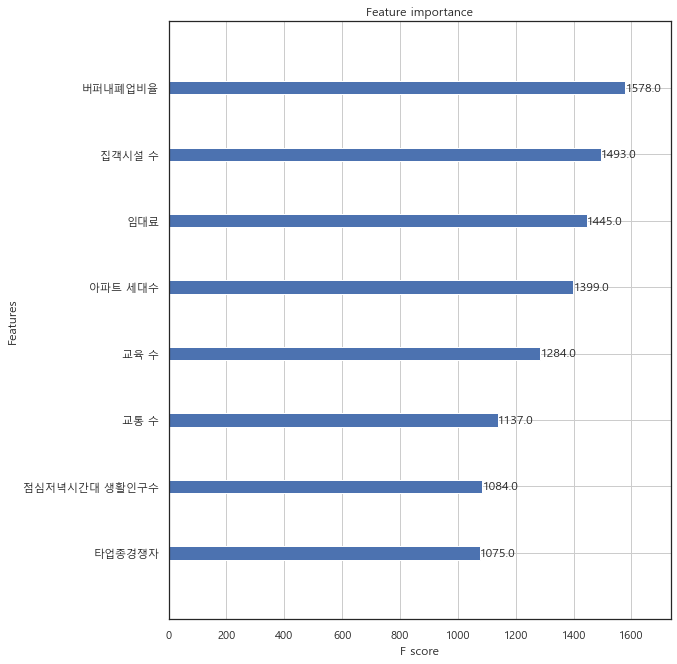

In [142]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(grid_cv2.best_estimator_, ax)


# 결과

다중공선성 제외변수 :  인허가 영업+폐업, 인허가 영업, 인허가 폐업, 소재지면적, 총생활인구수
로지스틱 제외변수 : '골목상권', '관광특구', 구분불가', '발달상권', '전통시장','경쟁자 수','타업종비율'

<최종 변수> 

:  교통 수/버퍼내폐업비율/아파트 세대수/타업종경쟁자/타업종비율/교육 수/	
임대료/집객시설 수

<모형>

(accuracy/F1 score)
LR : 0.8321/0.7845

KNN : 0.7605/0.7642

RF : 0.7654/0.77

RF(GridCV) :0.7876/0.7896

XGB : 0.7728/0.7872

XGb(GridCV) : 0.8467/0.8446


<변수 중요도>

집객시설 수>버퍼내폐업비율>임대료>교통 수>아파트 세대수>교육 수>점심저녁시간대 생활인구수>타업종경쟁자

<주요 변수와 생존의 관계>

집객시설 수↑ 생존확률 1.1배↑

버퍼내폐업비율↑ 생존확률 1.091배↑

임대료↑ 생존확률 1.622배↑


# 예측

In [ ]:
#예측할 데이터 불러오기
forecast = pd.read_csv('/content/drive/MyDrive/bigdata_ML/중식예측용.csv', encoding='cp949') #csv 불러오기, 코랩

forecast.head()

,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자
0,154,95,0.551809,6336,5113,10936.29824,8,1147
1,169,89,0.556452,11259,2582,10936.29824,8,1057
2,187,67,0.415167,13317,1124,29842.30973,6,742
3,247,96,0.530178,8118,3172,55277.92730,15,2799
4,35,75,0.429326,2338,5887,35491.54168,36,1647


In [ ]:
#예측할 데이터 불러오기
forecast = pd.read_csv('중식예측용.csv', encoding='cp949') #csv 불러오기, 주피터

forecast.head()

In [ ]:
kf = sm.add_constant(forecast, has_constant="add")#데이터에 상수항 추가
kf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종경쟁자
0,1.0,154,95,0.551809,6336,5113,10936.29824,8,1147
1,1.0,169,89,0.556452,11259,2582,10936.29824,8,1057
2,1.0,187,67,0.415167,13317,1124,29842.30973,6,742
3,1.0,247,96,0.530178,8118,3172,55277.92730,15,2799
4,1.0,35,75,0.429326,2338,5887,35491.54168,36,1647
...,...,...,...,...,...,...,...,...,...
1750,1.0,200,89,0.532889,6309,2779,26698.17565,15,2167
1751,1.0,240,97,0.531990,8762,1956,23624.75283,22,2719
1752,1.0,162,71,0.520846,5818,798,26266.09208,8,1537
1753,1.0,293,64,0.538462,14686,1504,24113.64599,9,997


In [ ]:
xgb_wrapper1 = XGBClassifier(colsample_bytree = 0.8, 
                            gamma = 0.5, learning_rate = 0.5, max_depth = 15, n_estimators = 200, random_state = 99)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper1.fit(x_train2, y_train,  eval_metric='logloss')

kfpred = xgb_wrapper1.predict(kf)
kfpred_proba = xgb_wrapper1.predict_proba(kf)[:, 1]
print(kfpred_proba[:10])


kfpred


[0.10650014 0.10650014 0.14147949 0.10650014 0.14147949 0.07045026
 0.17185853 0.17185853 0.18529493 0.18529493]


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
live = pd.DataFrame(kfpred)

In [ ]:
live.to_csv('chlive.csv',index=False,encoding='cp949') 

In [ ]:
live2 = pd.DataFrame(kfpred_proba)

In [ ]:
live2.to_csv('chlive1.csv',index=False,encoding='cp949') 